In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# For simplicity, let's turn this into a binary classification problem by selecting only two classes
# Here we select class 1 (Iris-versicolor) and class 2 (Iris-virginica)
X = X[y != 0]
y = y[y != 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the Perceptron model
classifier = Perceptron()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[15  2]
 [ 0 13]]
Accuracy: 0.93
Precision: 1.00
Recall: 0.88
F1 Score: 0.94


In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[[15  2]
 [ 0 13]]


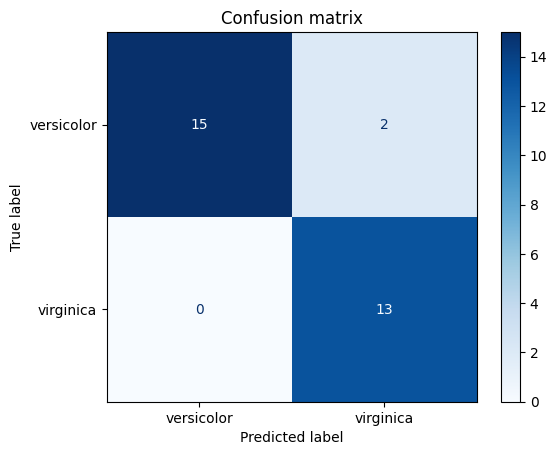

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = iris.target_names

disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names[1:],
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()